# Date Summaries
-  Difference
-  Count by Month/ Year
-  Find Missing Dates & Fill if required
-  Plot Dates wrt date, month, year
-  

In [218]:
from datetime import date, datetime, timedelta
from dateutil import parser, relativedelta
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
fake = Faker('en_IN')
#set indian profile to create data

In [183]:
for _ in range(10):
    print(fake.name())

Reyansh Virk
Jivin Swamy
Vanya Contractor
Zara Luthra
Yuvaan Bora
Arnav Kapadia
Yashvi Dalal
Lagan Kurian
Lakshay Dugal
Kartik Kar


In [184]:
def generate_random_date(start_date, end_date):
    return fake.date_between_dates(date_start=start_date, date_end=end_date)

In [185]:
num_rows = 1000
columns = ['empcode', 'dept', 'title', 'name', 'gender', 'DOJ', 'DOB'] 
#DOL (Leaving), lastDOP(last Promotion Date)
data = []

In [186]:
for _ in range(num_rows):
    empcode = fake.unique.random_number(digits=4)
    dept = fake.random_element(elements=('HR','IT','Marketing','Engineering'))
    title = fake.random_element(elements=('Mr.', 'Ms.'))
    name = fake.name()
    doj = generate_random_date(datetime(2015, 1, 1), datetime(2020, 1, 1)).strftime('%Y-%m-%d')
    dob = generate_random_date(datetime(1960, 1, 1), datetime(2000, 1, 1)).strftime('%Y-%m-%d')
    gender = fake.random_element(elements=('M', 'F'))
    data.append([empcode, dept, title, name, gender, doj, dob])
df = pd.DataFrame(data, columns=columns)
df.head()

,empcode,dept,title,name,gender,DOJ,DOB
0,6926,Marketing,Mr.,Madhav Bhandari,F,2017-03-12,1999-10-12
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01
2,235,HR,Ms.,Veer Batra,F,2016-05-18,1984-10-30
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empcode  1000 non-null   int64 
 1   dept     1000 non-null   object
 2   title    1000 non-null   object
 3   name     1000 non-null   object
 4   gender   1000 non-null   object
 5   DOJ      1000 non-null   object
 6   DOB      1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [188]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   empcode  1000 non-null   int64         
 1   dept     1000 non-null   object        
 2   title    1000 non-null   object        
 3   name     1000 non-null   object        
 4   gender   1000 non-null   object        
 5   DOJ      1000 non-null   datetime64[ns]
 6   DOB      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 54.8+ KB


In [189]:
df.head()

,empcode,dept,title,name,gender,DOJ,DOB
0,6926,Marketing,Mr.,Madhav Bhandari,F,2017-03-12,1999-10-12
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01
2,235,HR,Ms.,Veer Batra,F,2016-05-18,1984-10-30
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19


In [190]:
from dateutil.relativedelta import relativedelta
# otherwise call error

In [191]:
today = datetime.today()
today

datetime.datetime(2024, 3, 15, 14, 39, 5, 916154)

In [192]:
age

<function __main__.age(date1)>

In [193]:
def ageF(date1):
    today = datetime.today()
    age = relativedelta(today, date1).years
    return age

In [194]:
df['age'] = df['DOB'].apply(ageF)

In [195]:
#create DOL on random no of days served
today + relativedelta(months=5)

datetime.datetime(2024, 8, 15, 14, 39, 5, 916154)

In [196]:
df['DOJ'].apply(lambda x : x + relativedelta(months=5))

0     2017-08-12
1     2016-07-10
2     2016-10-18
3     2016-03-15
4     2015-06-02
         ...    
995   2016-01-09
996   2015-09-30
997   2020-03-29
998   2018-08-20
999   2018-07-12
Name: DOJ, Length: 1000, dtype: datetime64[ns]

In [197]:
np.random.randint(10,20)

13

In [198]:
df['DOL'] = df['DOJ'].apply(lambda x : x + relativedelta(months=np.random.randint(10,20)))

In [199]:
df.head()

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL
0,6926,Marketing,Mr.,Madhav Bhandari,F,2017-03-12,1999-10-12,24,2018-08-12
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01,42,2017-06-10
2,235,HR,Ms.,Veer Batra,F,2016-05-18,1984-10-30,39,2017-06-18
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11,55,2017-01-15
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19,52,2016-05-02


In [200]:
def tenureF(date1, date2):
    tenure = relativedelta(date2, date1).years
    return tenure

In [201]:
df['tenure'] = np.round((df['DOL']- df['DOJ']).dt.days/30)
df.head()

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
0,6926,Marketing,Mr.,Madhav Bhandari,F,2017-03-12,1999-10-12,24,2018-08-12,17.0
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01,42,2017-06-10,16.0
2,235,HR,Ms.,Veer Batra,F,2016-05-18,1984-10-30,39,2017-06-18,13.0
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11,55,2017-01-15,15.0
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19,52,2016-05-02,16.0


In [202]:
# served between (day interval)

In [203]:
df.describe(include='all')

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.00000,1000,1000.000000
unique,NaN,4,2,997,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Engineering,Mr.,Pari Setty,F,NaN,NaN,NaN,NaN,NaN
freq,NaN,269,504,2,513,NaN,NaN,NaN,NaN,NaN
mean,5055.114000,NaN,NaN,NaN,NaN,2017-06-22 14:44:09.599999744,1980-06-30 12:47:31.200000,43.18500,2018-09-03 08:52:47.999999744,14.379000
min,4.000000,NaN,NaN,NaN,NaN,2015-01-02 00:00:00,1960-01-17 00:00:00,24.00000,2015-11-16 00:00:00,10.000000
25%,2720.250000,NaN,NaN,NaN,NaN,2016-03-18 18:00:00,1971-02-26 18:00:00,33.00000,2017-06-05 00:00:00,12.000000
50%,5057.000000,NaN,NaN,NaN,NaN,2017-07-01 12:00:00,1980-08-29 12:00:00,43.00000,2018-09-09 12:00:00,14.000000
75%,7557.750000,NaN,NaN,NaN,NaN,2018-09-04 06:00:00,1990-04-30 00:00:00,53.00000,2019-11-11 06:00:00,17.000000
max,9983.000000,NaN,NaN,NaN,NaN,2019-12-31 00:00:00,1999-12-16 00:00:00,64.00000,2021-07-10 00:00:00,19.000000


In [204]:
df.loc[df['DOJ'].between('2015-1-1', '2016-3-31')]

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01,42,2017-06-10,16.0
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11,55,2017-01-15,15.0
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19,52,2016-05-02,16.0
12,6403,IT,Mr.,Nishith Badal,F,2015-05-16,1993-12-25,30,2016-09-16,16.0
13,9653,IT,Ms.,Manjari Dube,F,2015-10-27,1965-01-17,59,2017-02-27,16.0
...,...,...,...,...,...,...,...,...,...,...
975,7409,Marketing,Mr.,Arnav Dora,F,2015-12-12,1974-04-14,49,2017-05-12,17.0
988,6614,Engineering,Mr.,Anahita Ben,M,2015-03-18,1961-06-10,62,2016-07-18,16.0
989,6702,Marketing,Mr.,Tanya Magar,M,2016-01-03,1984-07-05,39,2016-11-03,10.0
995,1666,HR,Ms.,Anahita Kalita,M,2015-08-09,1980-04-07,43,2016-08-09,12.0


In [205]:
#another way
df.loc[df['DOJ'].isin(pd.date_range('2015-1-1', '2016-3-31'))]

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01,42,2017-06-10,16.0
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11,55,2017-01-15,15.0
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19,52,2016-05-02,16.0
12,6403,IT,Mr.,Nishith Badal,F,2015-05-16,1993-12-25,30,2016-09-16,16.0
13,9653,IT,Ms.,Manjari Dube,F,2015-10-27,1965-01-17,59,2017-02-27,16.0
...,...,...,...,...,...,...,...,...,...,...
975,7409,Marketing,Mr.,Arnav Dora,F,2015-12-12,1974-04-14,49,2017-05-12,17.0
988,6614,Engineering,Mr.,Anahita Ben,M,2015-03-18,1961-06-10,62,2016-07-18,16.0
989,6702,Marketing,Mr.,Tanya Magar,M,2016-01-03,1984-07-05,39,2016-11-03,10.0
995,1666,HR,Ms.,Anahita Kalita,M,2015-08-09,1980-04-07,43,2016-08-09,12.0


In [206]:
# count employees joined in each year
df.groupby(df.DOJ.dt.year)['DOJ'].agg({'count'})

,count
DOJ,
2015,199
2016,205
2017,201
2018,203
2019,192


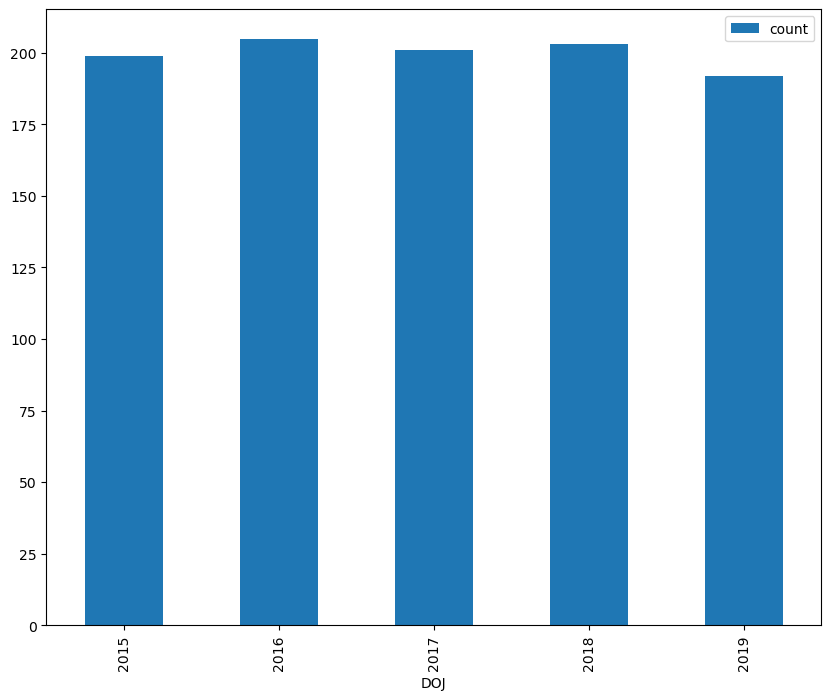

In [207]:
df.groupby(df.DOJ.dt.year)['DOJ'].agg({'count'}).plot(kind='bar', figsize= (10,8))
plt.show()

In [208]:
# year of birth
df.groupby(df.DOB.dt.year)['DOB'].agg({'count'})

,count
DOB,
1960,19
1961,28
1962,27
1963,17
1964,21
1965,23
1966,20
1967,22
1968,29


<Axes: xlabel='DOB'>

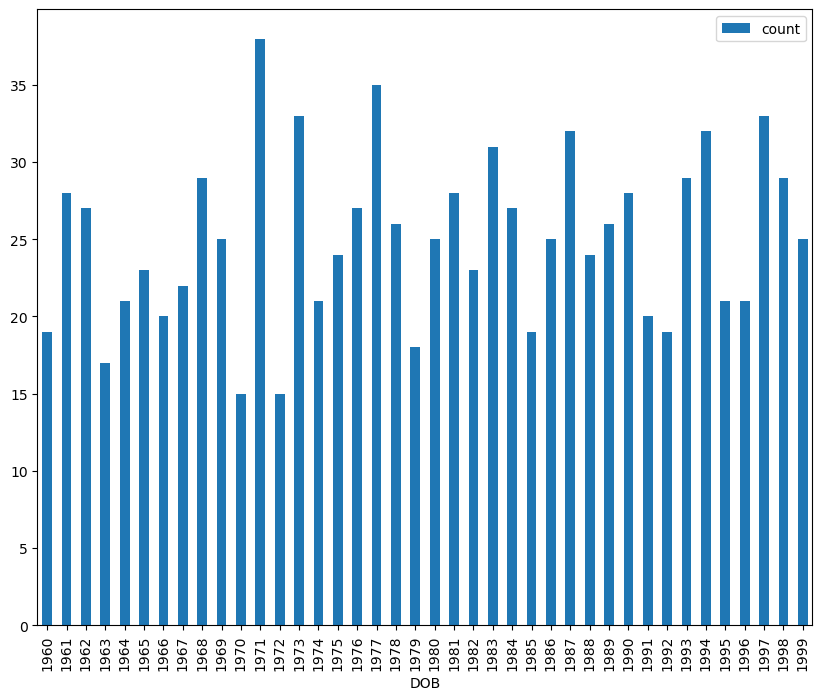

In [209]:
df.groupby(df.DOB.dt.year)['DOB'].agg({'count'}).plot(kind='bar', figsize= (10,8))

In [210]:
# time series plot

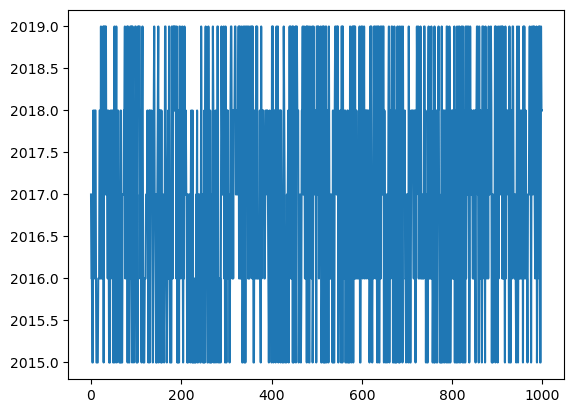

In [211]:
plt.plot(df.DOJ.dt.year)

In [212]:
df.groupby([df.DOJ.dt.year, df.DOJ.dt.month]).agg(count=('empcode','count'))

count
DOJ  DOJ       
2015 1       14
     2       24
     3       18
     4       16
     5       14
     6       12
     7       16
     8       17
     9       15
     10      23
     11      13
     12      17
2016 1       20
     2       18
     3       23
     4       19
     5       24
     6       10
     7       14
     8       23
     9        7
     10      18
     11      10
     12      19
2017 1       17
     2       19
     3       21
     4       18
     5        8
     6       13
     7       13
     8       16
     9       21
     10      13
     11      25
     12      17
2018 1       17
     2       14
     3       19
     4       20
     5       15
     6       12
     7       27
     8       17
     9       20
     10      14
     11      18
     12      10
2019 1       14
     2       16
     3       16
     4       16
     5       16
     6        9
     7       19
     8       16
     9       19
     10      22
     11      12
     12      17

#df['DOJ'].resample('M')

In [213]:
df['yearDOJ'] = df.DOJ.dt.year
df['monthDOJ'] = df.DOJ.dt.month
df.head()
#df.groupby([yearDOJ, monthDOJ]).agg(count=('empcode','count'))

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure,yearDOJ,monthDOJ
0,6926,Marketing,Mr.,Madhav Bhandari,F,2017-03-12,1999-10-12,24,2018-08-12,17.0,2017,3
1,6298,IT,Ms.,Saira Tella,M,2016-02-10,1981-06-01,42,2017-06-10,16.0,2016,2
2,235,HR,Ms.,Veer Batra,F,2016-05-18,1984-10-30,39,2017-06-18,13.0,2016,5
3,6803,HR,Mr.,Indranil Swamy,F,2015-10-15,1968-05-11,55,2017-01-15,15.0,2015,10
4,8308,IT,Mr.,Samarth Ganguly,M,2015-01-02,1971-06-19,52,2016-05-02,16.0,2015,1


In [227]:
countDOJ = df.groupby(['yearDOJ', 'monthDOJ']).agg(count=('empcode','count')).reset_index()
countDOJ.head()

,yearDOJ,monthDOJ,count
0,2015,1,14
1,2015,2,24
2,2015,3,18
3,2015,4,16
4,2015,5,14


In [229]:
# convert to 2D
countDOJ2D = countDOJ.pivot(index='yearDOJ', columns='monthDOJ', values='count')
countDOJ2D

monthDOJ,1,2,3,4,5,6,7,8,9,10,11,12
yearDOJ,,,,,,,,,,,,
2015,14,24,18,16,14,12,16,17,15,23,13,17
2016,20,18,23,19,24,10,14,23,7,18,10,19
2017,17,19,21,18,8,13,13,16,21,13,25,17
2018,17,14,19,20,15,12,27,17,20,14,18,10
2019,14,16,16,16,16,9,19,16,19,22,12,17


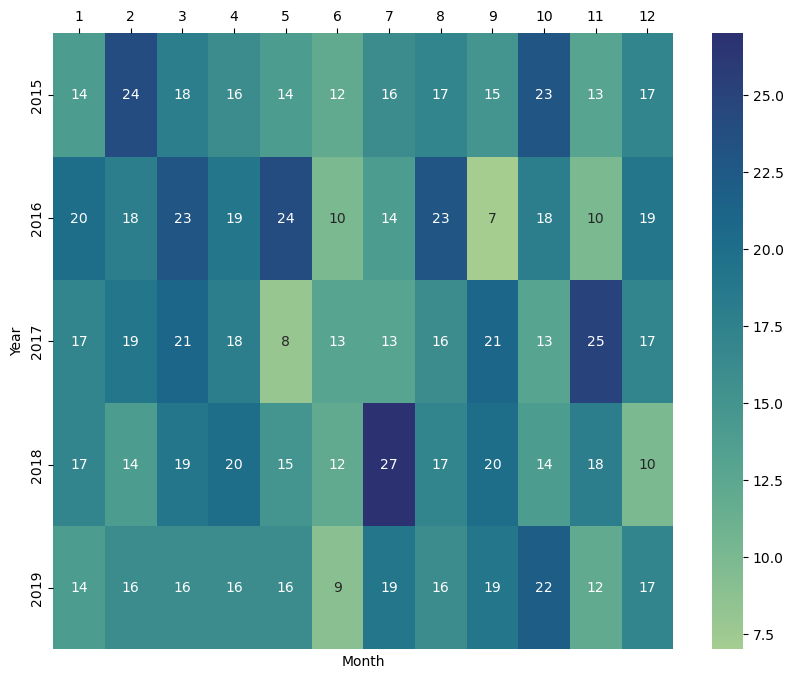

In [236]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(countDOJ2D, annot=True, cmap='crest')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.xaxis.tick_top()
plt.show()